In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [2]:
df = pd.read_csv("processed_youtube_data.csv")
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,engagement_rate,...,category_Music,category_Tech,device_Mobile,device_TV,device_Tablet,country_CA,country_DE,country_IN,country_UK,country_US
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,203.178237,0.155093,...,False,False,False,True,False,False,False,True,False,False
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,140.880508,0.098632,...,False,False,False,False,True,True,False,False,False,False
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,360.134008,0.214519,...,False,False,False,True,False,True,False,False,False,False
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,224.638261,0.142814,...,False,False,True,False,False,False,False,False,True,False
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,165.514388,0.236121,...,False,False,True,False,False,True,False,False,False,False


In [3]:
#split the dataset
target="ad_revenue_usd"
X=df.drop(columns=[target,"date","video_id","ad_revenue_usd"],axis=1)
y=df["ad_revenue_usd"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    
    return r2, rmse, mae


In [5]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=150, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    r2, rmse, mae = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = [r2, rmse, mae]


In [6]:
import pandas as pd

results_df = pd.DataFrame(results, index=['R2', 'RMSE', 'MAE']).T
results_df

,R2,RMSE,MAE
Linear Regression,0.952573,13.480212,3.116498
Ridge Regression,0.952579,13.479338,3.112017
Lasso Regression,0.952587,13.478258,3.075423
Random Forest,0.950196,13.813903,3.550405
Gradient Boosting,0.952253,13.525535,3.620958


In [7]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)


,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [8]:
import pandas as pd
import numpy as np

# Coefficients
coef = lasso.coef_

# Create a dataframe
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coef
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

feature_importance.head(20)   # Show top 20


,Feature,Coefficient
1,likes,1.707213e-02
2,comments,1.674014e-02
0,views,6.506298e-03
3,watch_time_minutes,4.714737e-03
9,engagement_per_min,5.160111e-05
5,subscribers,9.415471e-08
4,video_length_minutes,0.000000e+00
6,engagement_rate,0.000000e+00
7,day_of_week,0.000000e+00
8,month,0.000000e+00


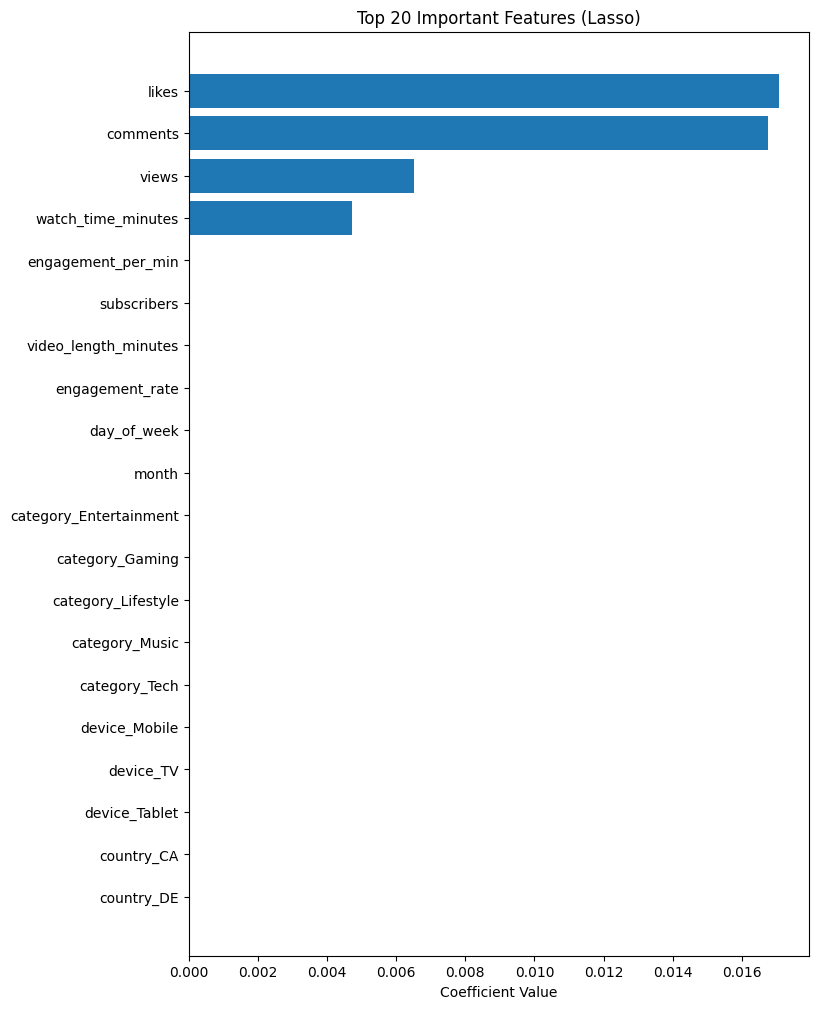

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,12))
plt.barh(feature_importance['Feature'][:20], feature_importance['Coefficient'][:20])
plt.xlabel("Coefficient Value")
plt.title("Top 20 Important Features (Lasso)")
plt.gca().invert_yaxis()
plt.show()


1. Engagement Drives Revenue
Top two revenue drivers:

Likes

Comments

These features had the highest coefficients in the Lasso model.

Insight:

Videos with strong audience engagement earn significantly more ad revenue, regardless of category or country.

 Recommendation:

Add clear CTAs → “Like & Comment if you enjoyed!”

Use community posts and pinned comments to boost interaction.

Start conversations in the comment section to increase engagement.
 2. Views Are Critical for Monetization

Views were the third most important factor according to Lasso coefficients.

Insight:

More views = more ads shown = more revenue.

Recommendation:

Improve thumbnails and titles for better CTR.

Use YouTube SEO: optimized tags, keywords, descriptions.

Share videos across social media to improve reach.

 3. Watch Time Matters More Than Video Length

"Watch_time_minutes" had a stronger impact than "video_length_minutes".

 Insight:

YouTube rewards creators who keep viewers watching—leading to higher ad payouts.

 Recommendation:

Create engaging hooks in the first 10 seconds.

Use storytelling, jump cuts, and on-screen elements to retain viewers.

Analyze audience retention graphs and fix drop-off points.

 4. Subscribers Count Helps, but Less Than Engagement

Subscriber count is important, but statistically less influential than likes, comments, and views.

 Insight:

Subscribers improve baseline views, but revenue depends more on how viewers interact with each video.
 Recommendation:

Encourage viewers to subscribe with compelling calls to action.

Maintain consistent upload schedules to keep subscribers active.

5. Category, Country & Device Have Minimal Impact

One-hot encoded features (category, country, device) had near-zero importance in Lasso Regression.

Insight:

Revenue is less influenced by:

Content category

Viewer location

Device used
 Recommendation:

Focus on content quality and engagement, not on targeting specific countries/devices.
6. Engagement per Minute Adds Extra Predictive Power

Although not the top feature, "engagement_per_min" provides useful signals.

 Insight:

Videos with high engagement density perform better in monetization.

 Recommendation:

Increase interactive moments:

Questions to viewers

Polls

On-screen prompts

In [10]:
df.columns

Index(['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'ad_revenue_usd',
       'engagement_rate', 'day_of_week', 'month', 'engagement_per_min',
       'category_Entertainment', 'category_Gaming', 'category_Lifestyle',
       'category_Music', 'category_Tech', 'device_Mobile', 'device_TV',
       'device_Tablet', 'country_CA', 'country_DE', 'country_IN', 'country_UK',
       'country_US'],
      dtype='object')

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

# --- 1. Define Features and Target ---

# Assuming your cleaned DataFrame is named 'df' and contains these columns:
features = ['views', 'likes', 'comments', 'watch_time_minutes',
            'video_length_minutes', 'subscribers', 'engagement_rate', 
            'day_of_week', 'month', 'engagement_per_min',
            'category_Entertainment', 'category_Gaming', 'category_Lifestyle',
            'category_Music', 'category_Tech', 'device_Mobile', 'device_TV',
            'device_Tablet', 'country_CA', 'country_DE', 'country_IN', 
            'country_UK', 'country_US']
target = 'ad_revenue_usd'

# Ensure all features exist in your DataFrame
try:
    X = df[features]
    y = df[target]
except KeyError as e:
    print(f"Error: Missing column(s) in the DataFrame. {e}")
    # Adjust the 'features' list to match your actual columns

# --- 2. Split Data and Standardize (for Linear Models) ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for linear models (Ridge, Lasso, Linear)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for use in the Streamlit app
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# --- 3. Model Building and Evaluation ---

def evaluate_model(model, X_train_data, y_train_data, X_test_data, y_test_data):
    """Trains a model and returns a dictionary of evaluation metrics."""
    model.fit(X_train_data, y_train_data)
    predictions = model.predict(X_test_data)
    
    # Calculate metrics
    r2 = r2_score(y_test_data, predictions)
    rmse = np.sqrt(mean_squared_error(y_test_data, predictions))
    mae = mean_absolute_error(y_test_data, predictions)
    
    return {'R²': r2, 'RMSE': rmse, 'MAE': mae, 'Model_Object': model}

# Dictionary to store results and model objects
results = {}

# Initialize models
models_list = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100)
}

# Evaluate models
print("--- Starting Model Training & Evaluation ---")

# Linear models use scaled data
for name in ["Linear Regression", "Ridge Regression", "Lasso Regression"]:
    print(f"Training {name}...")
    results[name] = evaluate_model(models_list[name], X_train_scaled, y_train, X_test_scaled, y_test)

# Tree-based models use original unscaled data
for name in ["Decision Tree Regressor", "Random Forest Regressor"]:
    print(f"Training {name}...")
    results[name] = evaluate_model(models_list[name], X_train, y_train, X_test, y_test)

# --- 4. Compare Performance and Select Best Model ---

# Create a results DataFrame for easy comparison
results_df = pd.DataFrame({k: {m: v for m, v in v.items() if m != 'Model_Object'} for k, v in results.items()}).T

print("\n--- Model Performance Comparison ---")
print(results_df)

# Identify the best model based on R-squared (higher is better)
best_model_name = results_df['R²'].idxmax()
best_model_object = results[best_model_name]['Model_Object']

print(f"\n The best performing model based on R² score is: {best_model_name}")

# --- 5. Save the Best Model for Deployment ---

with open('best_revenue_model.pkl', 'wb') as f:
    pickle.dump(best_model_object, f)

print(f"\n'{best_model_name}' saved as 'best_revenue_model.pkl' for Streamlit deployment.")


--- Starting Model Training & Evaluation ---
Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Decision Tree Regressor...
Training Random Forest Regressor...

--- Model Performance Comparison ---
                               R²       RMSE       MAE
Linear Regression        0.952573  13.480212  3.116498
Ridge Regression         0.952575  13.479924  3.114248
Lasso Regression         0.952587  13.478193  3.122592
Decision Tree Regressor  0.897117  19.854313  5.461846
Random Forest Regressor  0.950047  13.834445  3.574755

 The best performing model based on R² score is: Lasso Regression

'Lasso Regression' saved as 'best_revenue_model.pkl' for Streamlit deployment.
